In [2]:
import os
import sys
import pathlib

import cv2
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

import torchvision
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt 
import albumentations as albu

In [9]:
url = 'https://upload.wikimedia.org/wikipedia/commons/5/53/OpenCV_Logo_with_text.png'

from skimage import io
import torch
import numpy as np

image = io.imread(url)
image_t = torch.tensor(image)
image_t.dtype
# RGB channel order
# plt.imshow(image)
# image = np.asarray(image, dtype="uint8")


torch.uint8

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

# Fix to be able to import python modules inside a notebook
os.chdir('..')
# sys.path.append("../")

# Useful extensions
# %load_ext watermark
# %watermark -v -n -m -p numpy,torch,albumentations,photosynthesis_metrics

# %load_ext autoreload
# %autoreload 2

# Nice plot formating
%matplotlib inline

In [33]:
!ls

configs  Makefile    preprocess.py  requirements.txt  train.py
data	 notebooks   __pycache__    src
logs	 predict.py  README.md	    tmp.txt


In [34]:
# Sanity check that all files listed as queries do exist
# and all listed gallery files exist
# query_files = df[0].values
# gallery_files = df[1].values.tolist() \
#             + df[2].values.tolist() \
#             + df[3].values.tolist() \
#             + df[4].values.tolist() \
#             + df[5].values.tolist() \
#             + df[6].values.tolist() \
#             + df[7].values.tolist() \
#             + df[8].values.tolist() \
#             + df[9].values.tolist() \
#             + df[10].values.tolist()
#  assert map(lambda x: pathlib.Path(x).exists(), self.filenames), "Found missing images!"
# assert map(lambda x: pathlib.Path(f"data/raw/test_datadfgdfg_B/query/{x}").exists(), query_files), "Found missing images!"
# assert map(lambda x: pathlib.Path(f"data/raw/test_data_B/gallery/{x}").exists(), gallery_files), "Found missing images!"
# sum(list(map(lambda x: pathlib.Path(f"data/raw/test_data_B/query/{x}").exists(), query_files)))
# sum(list(map(lambda x: pathlib.Path(f"data/raw/test_data_B/gallery/{x}").exists(), gallery_files)))


In [35]:
from ipywidgets import interact, interactive, fixed, interact_manual
def show_predictions(query_idx, config_path, dba=True, aqe=True, diffusion=False, size=512):
    """Plots predictions from submission.csv"""
    filename =  f"submission{'_dba' if dba else ''}{'_aqe' if aqe else ''}_{size}.csv"
    df = pd.read_csv(
        pathlib.Path(config_path) / filename, header=None)
    print(filename)
    df[1] = df[1].apply(lambda x: x[1:])
    df[10] = df[10].apply(lambda x: x[:-1])
    # Sort, so that results indexes are always same
    df.sort_values(by=0, inplace=True)
    query_file = os.path.join("data/interim/test_data_B_512/query", df.iloc[query_idx].values[0])
    gallery_files = [os.path.join("data/interim/test_data_B_512/gallery", path) for path in df.iloc[query_idx].values[1:]]
    print(query_file, "\n", gallery_files)
    query = cv2.imread(query_file)
    query = cv2.cvtColor(query, cv2.COLOR_BGR2RGB)
    print(query_file, gallery_files[1], gallery_files[8])
    plt.figure(figsize=(20,15))
    plt.subplot(1, 11, 1)
    plt.imshow(query)
    for i in range(10):
        image = cv2.imread(gallery_files[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 11, i + 2)
        plt.imshow(image)

In [36]:
CONFIG_PATH = pathlib.Path("logs/genet_normal_384_hard_arcface80_15") 
FILENAME = f"submission_dba_aqe_512.csv"
df = pd.read_csv(
    CONFIG_PATH / FILENAME, header=None)
df[1] = df[1].apply(lambda x: x[1:])
df[10] = df[10].apply(lambda x: x[:-1])
print(len(df))
df.head()

41574


,0,1,2,3,4,5,6,7,8,9,10
0,04O36K1EVABPTQF7.jpg,BZO1LEPCQGM0IDU2.jpg,4DE6W8N07ZM2BLGS.jpg,L79AURYXEQM160KN.jpg,QBTDEXLK3HMJZS0A.jpg,ZTH6C59NL8SFY1XJ.jpg,WC4R3BLJ7O5ZYQT0.jpg,U7NY9IPAZ6M2XQOL.jpg,9LZ36NCBJWHOYUPM.jpg,42XDE5YNOGFJV1ZQ.jpg,TH1CSVFR4OEUX809.jpg
1,05KTPHIDM4SCLU8O.jpg,WQHNI9AOGFXPDLC2.jpg,EMU8OGD14FBRNP9C.jpg,8TMD9275VI0PJOBU.jpg,IPW5D4BLZUXNRQHE.jpg,JGZ72CEFLIUDMP93.jpg,63JW8L1CTO7XUFYB.jpg,C5BDYZWQSA6X3IPN.jpg,GWB1SMR76OVQ4H9T.jpg,DHA0ZSPGL5BXKOVE.jpg,0PZ394D78QH6ICE2.jpg
2,06PC4NDUG1I78L3W.jpg,2SPX6GL5WEKAJ43R.jpg,ZLIO8YMVKSF2CW10.jpg,7W9J6KQRH5OE2NXA.jpg,1FZS0NXDGW52MP9I.jpg,IVBH5L4REXCS7PAQ.jpg,Z2IX63NSLJ7UF9EM.jpg,7Q5KFD0R1P8CSNLU.jpg,YQ01U2H39RMNXTLS.jpg,5GYDKJIA60CMOQEP.jpg,N0GODPVHY9QW81K2.jpg
3,0951SEM26AY3TJON.jpg,KYP6BQ07WJVC19XD.jpg,A7XSMEKGFQPC2O60.jpg,GKPAVMDJ8T94C0SB.jpg,O073UTPHVBIYX5ZC.jpg,9U52FJLMID6EK4GA.jpg,CFPR0879MXGNDIKU.jpg,6E9L3JXKYHAB721I.jpg,4OSGYW9HQPNVXEC0.jpg,YS6HWKGA8235LRF7.jpg,RF7IYPH25X384QDK.jpg
4,09B7GV2DPMI4JYHL.jpg,1HDECJ2W0U6GFRVS.jpg,IFZDVCQG9HUJB3YO.jpg,XOE26TCS08KGB39U.jpg,U1RYDLEV72F8ZS50.jpg,MZODGAW49S6NRVLK.jpg,JV4SQXGB510UHFDZ.jpg,T3C1WRIN8Q9LG4U0.jpg,PXQB263KHAZNMRJV.jpg,5ATFIZ1YMR2PB97S.jpg,JYVWPD8T9L5ZRMXI.jpg


In [40]:
# df.head()
# len(df)
interact_manual(show_predictions, config_path=fixed(CONFIG_PATH), query_idx=(0,len(df)), size=(384, 512, 128));

interactive(children=(IntSlider(value=20787, description='query_idx', max=41574), Checkbox(value=True, descrip…

In [16]:
import cv2
# import cv2.xfeatures2d as cv
import numpy
from time import time
import pydegensac
from matplotlib import pyplot as plt
from copy import deepcopy

In [17]:
#We will draw correspondences found and the geometric transformation between the images.
def decolorize(img):
    return  cv2.cvtColor(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB)
def draw_matches(kps1, kps2, tentatives, img1, img2, H, mask):
    if H is None:
        print ("No homography found")
        return
    matchesMask = mask.ravel().tolist()
    h,w,ch = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, H)
    #print (dst)
    #Ground truth transformation
#     dst_GT = cv2.perspectiveTransform(pts, H_gt)
    img2_tr = cv2.polylines(decolorize(img2),[np.int32(dst)],True,(0,0,255),3, cv2.LINE_AA)
#     img2_tr = cv2.polylines(deepcopy(img2_tr),[np.int32(dst_GT)],True,(0,255,0),3, cv2.LINE_AA)
    # Blue is estimated, green is ground truth homography
    draw_params = dict(matchColor = (255,255,0), # draw matches in yellow color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
    img_out = cv2.drawMatches(decolorize(img1),kps1,img2_tr,kps2,tentatives,None,**draw_params)
    plt.figure()
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(img_out, interpolation='nearest')
    return

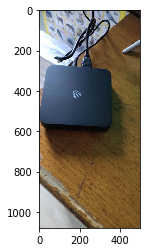

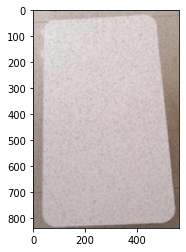

In [30]:
# img1 = "data/raw/test_data_B/query/0OWZNAL8IRX5PES1.jpg"
                                                 
# img2 = "data/raw/test_data_B/gallery/3VUB0E98COZSL7IM.jpg" # correct 
# img2 = "data/raw/test_data_B/gallery/9FDY6NBTX4QCPAS2.jpg" # correct 
# img2 = "data/raw/test_data_B/gallery/XKY5BIV0MZHCWT62.jpg" # correct 
# img2 = "data/raw/test_data_B/gallery/FWGLI41DAN3P6ZVT.jpg" # incorrect
# img2 = "data/raw/test_data_B/gallery/UZPTN968W527OBEI.jpg" # incorrect

# img1 = "data/raw/test_data_B/query/05KTPHIDM4SCLU8O.jpg"
# img2 = "data/raw/test_data_B/gallery/M8LQXCUITP9VDKY7.jpg"

img1 = "data/raw/test_data_B/query/0AZH9X7GCV1WMDE2.jpg"
img2 = "data/raw/test_data_B/gallery/H05MGFX74TPK3UCZ.jpg"

 
#Lets load some images and detect some featues
# Images are from HSequences dataset  https://github.com/hpatches/hpatches-dataset
img1 = cv2.cvtColor(cv2.imread(img1), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(img2), cv2.COLOR_BGR2RGB)


# H_gt =np.loadtxt('img/v_dogman/H_1_6')

# SIFT is not available by pip install, so lets use AKAZE features
# det = cv2.AKAZE_create(descriptor_type = 3, threshold=0.00001)
# det = cv2.SIFT_create()
# det = cv2.xfeatures2d.SURF_create(hessianThreshold=0, extended=False)
# kps1, descs1 = det.detectAndCompute(img1,None)
# kps2, descs2 = det.detectAndCompute(img2,None)


# det = cv2.ORB_create(3000)    
# kps1, descs1 = det.detectAndCompute(img1,None)
# kps2, descs2 = det.detectAndCompute(img2,None)

# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# tentatives = bf.match(descs1,descs2)

# det = cv2.ORB_create(3000, WTA_K=3)    
# kps1, descs1 = det.detectAndCompute(img1,None)
# kps2, descs2 = det.detectAndCompute(img2,None)

# print(kps1, kps2)
# #     bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# bf = cv2.BFMatcher(cv2.NORM_HAMMING2, crossCheck=True)
# tentatives = bf.match(descs1,descs2)

# # AKAZE features output "detection" scale, which is 6x less than one used for descriptor
# # For correct drawing, we increase it manually
# # for i in range(len(kps1)):
# #     kps1[i].size = 5*kps1[i].size
# # for i in range(len(kps2)):
# #     kps2[i].size = 5*kps2[i].size

# vis_img1, vis_img2 = None,None
# vis_img1 = cv2.drawKeypoints(cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY),kps1,vis_img1, 
#                              flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# vis_img2 = cv2.drawKeypoints(cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY),kps2,vis_img2, 
#                              flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# plt.imshow(vis_img1)
# plt.figure()
# plt.imshow(vis_img2)

plt.imshow(img1)
plt.figure()
plt.imshow(img2)

In [19]:
# BFMatcher with default params
# bf = cv2.BFMatcher()
# matches = bf.knnMatch(descs1,descs2, k=2)

# # Need to draw only good matches, so create a mask
# matchesMask = [False for i in range(len(matches))]

# # SNN ratio test
# for i,(m,n) in enumerate(matches):
#     if m.distance < 0.9*n.distance:
#         matchesMask[i]=True
# tentatives = [m[0] for i, m in enumerate(matches) if matchesMask[i] ]

In [27]:
#Now helper function for running homography RANSAC
def verify_cv2(kps1, kps2, tentatives, th = 4.0 , n_iter = 2000):
    src_pts = np.float32([ kps1[m.queryIdx].pt for m in tentatives ]).reshape(-1,2)
    dst_pts = np.float32([ kps2[m.trainIdx].pt for m in tentatives ]).reshape(-1,2)
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, th, 0.99, n_iter)
    print ('cv2 found {} inliers'.format(int(deepcopy(mask).astype(np.float32).sum())))
    return H, mask

def verify_pydegensac(kps1, kps2, tentatives, th = 4.0,  n_iter = 2000):
    src_pts = np.float32([ kps1[m.queryIdx].pt for m in tentatives ]).reshape(-1,2)
    dst_pts = np.float32([ kps2[m.trainIdx].pt for m in tentatives ]).reshape(-1,2)
    H, mask = pydegensac.findHomography(src_pts, dst_pts, th, 0.99, n_iter)
    print ('pydegensac found {} inliers'.format(int(deepcopy(mask).astype(np.float32).sum())))
#     print (mask.sum())
    return H, mask

In [28]:
th = 4.0
n_iter = 6000

t=time()
cv2_H, cv2_mask = verify_cv2(kps1,kps2,tentatives, th, n_iter )
print ("{0:.5f}".format(time()-t), ' sec cv2')

t=time()
cmp_H, cmp_mask = verify_pydegensac(kps1,kps2,tentatives, th, n_iter)
print ("{0:.5f}".format(time()-t), ' sec pydegensac')


draw_matches(kps1, kps2, tentatives, img1, img2, cv2_H, cv2_mask)
draw_matches(kps1, kps2, tentatives, img1, img2, cmp_H, cmp_mask)

NameError: name 'tentatives' is not defined

In [22]:
def SIFT_KNN(img1, img2):
    t1 = cv2.imread(img1,0)
    t2 = cv2.imread(img2,0)

    sift=cv2.xfeatures2d.SURF_create(300, extended=True)
    kp1, des1 = sift.detectAndCompute(t1, None)
    kp2, des2 = sift.detectAndCompute(t2, None)
    
    # FLANN parameters
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=500)   # or pass empty dictionary

    flann = cv2.FlannBasedMatcher(index_params,search_params)
    
    matches = flann.knnMatch(des1,des2,k=2)

    # ratio test as per Lowe's paper
    counter = 0
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7 * n.distance:
            counter += 1
    return counter



In [23]:


# img1 = "data/interim/test_data_B_768/query/R89YNJH20AP63WZG.jpg"
# img2 = "data/interim/test_data_B_768/gallery/03YQZBJW9OV6XS81.jpg"
# img2 = "data/interim/test_data_B_768/gallery/M6OKR3H8CB4J2A95.jpg"


SIFT_KNN(img1, img2)

TypeError: bad argument type for built-in operation